In [2]:
import torch
from torch.utils.data.dataset import Dataset

Image name: person-7.jpg
Landmarks shape: (68, 2)
First 4 Landmarks: [[32. 65.]
 [33. 76.]
 [34. 86.]
 [34. 97.]]


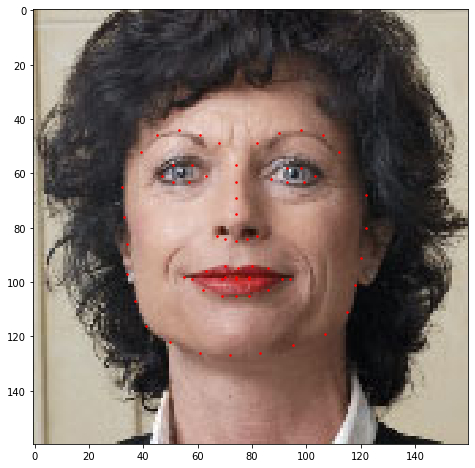

In [16]:
landmarks_frame = pd.read_csv('data/faces/face_landmarks.csv')

n = 65
img_name = landmarks_frame.iloc[n, 0]
landmarks = landmarks_frame.iloc[n, 1:].as_matrix()
landmarks = landmarks.astype('float').reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))


def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s = 10, marker = '.', c = 'r')
    plt.pause(0.001)
    
plt.figure(figsize = (8, 8))
show_landmarks(io.imread(os.path.join('data/faces/', img_name)), landmarks)
plt.show()

In [18]:
class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""
    
    def __init__(self, csv_file, root_dir, transform = None):
        """
        Args:
            csv_file(string): Path to the csv file with annotations.
            root_dir(string): Directory with all the images.
            transform(callable, optional): Optional transform to be applied on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.landmarks_frame)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}
        
        if self.transform:
            sample = self.transform(sample)
            
        return sample

0 (324, 215, 3) (68, 2)


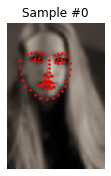

1 (500, 333, 3) (68, 2)


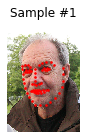

2 (250, 258, 3) (68, 2)


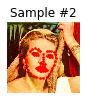

3 (434, 290, 3) (68, 2)


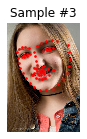

In [22]:
face_dataset = FaceLandmarksDataset(csv_file = 'data/faces/face_landmarks.csv',
                                    root_dir = 'data/faces/')
fig = plt.figure(figsize = (8,8))

for i in range(len(face_dataset)):
    sample = face_dataset[i]
    
    print(i, sample['image'].shape, sample['landmarks'].shape)
    
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)
    
    if i == 3:
        plt.show()
        break

***

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

class MyCustomDataset(Dataset):
    def __init__(self, ...):        
        # # All the data preperation tasks can be defined here
        # - Deciding the dataset split (train/test/ validate)
        # - Data Transformation methods 
        # - Reading annotation files (CSV/XML etc.)
        # - Prepare the data to read by an index
        
    def __getitem__(self, index):        
        # # Returns data and labels
        # - Apply initiated transformations for data
        # - Push data for GPU memory
        # - better to return the data points as dictionary/ tensor  
        return (img, label)
    
    def __len__(self):
        return count # of how many examples(images?) you have

* Datasets will expand with more and more samples and, therefore, we do not want to store too many tensors in memory at runtime in the Dataset object. Instead, we will form the tensors as we iterate through the samples list. This approach may be bit slow in processing but save us from going out of memory. 

* __init__ function should be the place where all the initial data preparations and logics happens. Do the operations where you may need to read data annotation files (CSV/XML etc.) here. 

* If you have separate portions of the dataset for train/test and validate, make sure you define that logic inside __init__ function. You can pass the desired data split as an argument for the function.

* __init__ function is the place where you can define the data transformations. For an example, if you have image data to load and need to do resize and normalize images you can use torchvision transforms here.

* Make sure you index your custom dataset in a relational structure when initiating. Generating an array or a list of the datapoints is a better way to do it.

* __len__ function comes handy to see how many data points has been loaded through init. The data length is normally the number of records loaded into the final list or array you created inside __init__ .   

* __getitem__ function should be light weight. Avoid using too complex computations inside __getitem__ function.  

* PyTorch DataLoaders just call __getitem__() and wrap them up a batch when performing training or inferencing. So, this function is iterative. Make sure you return one datapoint at a time. 

* Always try to return the values from __getitem__ as tensors. 

* If you have multiple components to return from the DataLoader, using a Python dictionary is a handy option. You can structure it as key value pairs in the dictionary. Here’s an example dictionary item which contains four values in it.  

In [ ]:
item = {
         'video_id' : video_id,
          'activity_id' :activity_id,
          'activity_frame': activity_frame_as_tensor,
          'activity_annotation' : activity_annotation
        }

***

In [1]:
from torch.utils.data import Dataset

class NumbersDataset(Dataset):
    def __init__(self):
        self.samples = list(range(1, 1001))
        
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        return self.samples[idx]
    
dataset = NumbersDataset()
print(len(dataset))
print(dataset[100])
print(dataset[122:361])

1000
101
[123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 

In [3]:
class NumbersDataset(Dataset):
    def __init__(self, low, high):
        self.samples = list(range(low, high))
        
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        return self.samples[idx]
    
dataset = NumbersDataset(2821, 8295)
print(len(dataset))
print(dataset[100])
print(dataset[122:361])

5474
2921
[2943, 2944, 2945, 2946, 2947, 2948, 2949, 2950, 2951, 2952, 2953, 2954, 2955, 2956, 2957, 2958, 2959, 2960, 2961, 2962, 2963, 2964, 2965, 2966, 2967, 2968, 2969, 2970, 2971, 2972, 2973, 2974, 2975, 2976, 2977, 2978, 2979, 2980, 2981, 2982, 2983, 2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999, 3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3076, 3077, 3078, 3079, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107,

In [5]:
import os
from torch.utils.data import Dataset

class TESNamesDataset(Dataset):
    def __init__(self, data_root):
        self.samples = []
        
        for race in os.listdir(data_root):
            race_folder = os.path.join(data_root, race)
            
            for gender in os.listdir(race_folder):
                gender_filepath = os.path.join(race_folder, gender)
                
                with open(gender_filepath, 'r') as gender_file:
                    for name in gender_file.read().splitlines():
                        self.samples.append((race, gender, name))
                        
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        return self.samples[idx]


In [6]:
dataset = TESNamesDataset('C:\\Users\\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\Outros\\tes-names')
print(len(dataset))
print(dataset[420])

19491
('Altmer', 'Female', 'Hanyarie')


In [ ]:
from torch.utils.data import DataLoader
import torch

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

dataset = TESNamesDataset('C:\\Users\\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\Outros\\tes-names')
dataloader = DataLoader(dataset, batch_size = 50, shuffle = True, num_workers = 0) # num_workers > 0 causes "Broken pipe" error

for i, batch in enumerate(dataloader):
    print(i, batch)

In [14]:
class NumbersDataset(Dataset):
    def __init__(self, low, high):
        self.samples = list(range(low, high))
        
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        n = self.samples[idx]
        successors = torch.arange(4).float() + n + 1
        noisy = torch.randn(4) + successors
        
        return str(n), successors, noisy
    
    
dataset = NumbersDataset(100, 120)
dataloader = DataLoader(dataset, batch_size = 10, shuffle = True)
print(next(iter(dataloader)))

[('108', '110', '114', '102', '119', '117', '100', '104', '106', '112'), tensor([[109., 110., 111., 112.],
        [111., 112., 113., 114.],
        [115., 116., 117., 118.],
        [103., 104., 105., 106.],
        [120., 121., 122., 123.],
        [118., 119., 120., 121.],
        [101., 102., 103., 104.],
        [105., 106., 107., 108.],
        [107., 108., 109., 110.],
        [113., 114., 115., 116.]]), tensor([[108.0836, 108.6654, 111.0155, 110.5290],
        [110.2691, 111.9363, 110.4881, 114.5479],
        [113.7911, 116.1074, 116.3231, 116.7133],
        [102.5116, 105.8854, 106.0996, 106.9116],
        [119.0807, 120.3826, 121.8787, 122.9569],
        [118.4164, 117.5554, 120.2739, 122.7051],
        [101.9770, 104.4751, 100.9427, 103.3662],
        [105.8270, 104.5874, 106.0792, 108.6971],
        [106.8012, 108.6581, 109.7375, 110.5815],
        [112.9993, 112.6531, 113.3388, 117.4936]])]


Note that we have not changed the dataset constructor but rather the __getitem__ function. Good practice for PyTorch datasets is that you keep in mind how the dataset will scale with more and more samples and, therefore, we do not want to store too many tensors in memory at runtime in the Dataset object. Instead, we will form the tensors as we iterate through the samples list, trading off a bit of speed for memory.

In [17]:
from sklearn.preprocessing import LabelEncoder

class TESNamesDataset(Dataset):
    def __init__(self, data_root, charset):
        self.data_root = data_root
        self.charset = charset
        self.samples = []
        self.race_codec = LabelEncoder()
        self.gender_codec = LabelEncoder()
        self.char_codec = LabelEncoder()
        self._init_dataset()
        
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        race, gender, name = self.samples[idx]
        return self.one_hot_sample(race, gender, name)
    
    def _init_dataset(self):
        races = set()
        genders = set()
        
        for race in os.listdir(self.data_root):
            race_folder = os.path.join(self.data_root, race)
            races.add(race)
            
            for gender in os.listdir(race_folder):
                gender_filepath = os.path.join(race_folder, gender)
                genders.add(gender)
                
                with open(gender_filepath, 'r') as gender_file:
                    for name in gender_file.read().splitlines():
                        self.samples.append((race, gender, name))
                        
        
        self.race_codec.fit(list(races))
        self.gender_codec.fit(list(genders))
        self.char_codec.fit(list(self.charset))
        
    def to_one_hot(self, codec, values): # O que diabos essa função faz?
        value_idxs = codec.transform(values)
        return torch.eye(len(codec.classes_))[value_idxs]
    
    def one_hot_sample(self, race, gender, names):
        t_race = self.to_one_hot(self.race_codec, [race])
        t_gender = self.to_one_hot(self.gender_codec, [gender])
        t_name = self.to_one_hot(self.char_codec, list(names))
        return t_race, t_gender, t_name
    
    
import string
data_root = 'C:\\Users\\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\Outros\\tes-names'
charset = string.ascii_letters + "-' "
dataset = TESNamesDataset(data_root, charset)
print(len(dataset))
print(dataset[420])

19491
(tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), tensor([[1., 0.]]), tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 